# VQE for ZZ

In [3]:
from qiskit import *
import numpy as np
from math import pi, sqrt

In [4]:
def HS(M1, M2):
    """Hilbert-Schmidt-Product of two matrices M1, M2"""
    return (np.dot(M1.conjugate().transpose(), M2)).trace()



def decompose(H):
    """Decompose Hermitian 4x4 matrix H into Pauli matrices"""
    from numpy import kron
    sx = np.array([[0, 1],  [ 1, 0]], dtype=np.complex128)
    sy = np.array([[0, -1j],[1j, 0]], dtype=np.complex128)
    sz = np.array([[1, 0],  [0, -1]], dtype=np.complex128)
    id = np.array([[1, 0],  [ 0, 1]], dtype=np.complex128)
    S = [id, sx, sy, sz]
    labels = ['I', 'sigma_x', 'sigma_y', 'sigma_z']
    for i in range(4):
        for j in range(4):
            label = labels[i] + labels[j]
            a_ij = 0.25 * HS(kron(S[i], S[j]), H)
            if a_ij != 0.0:
                print(a_ij,'*' ,label, '+')

In [6]:
M = np.array([[1,0,0,0], [0,-1,0,0], [0,0,-1,0],[0,0,0,1]])

In [7]:
decompose(M)

(1+0j) * sigma_zsigma_z +


## The matrix is  
$(1+0j) * ZZ$  

So no basis change is required.

# The ansatz

In [62]:
def ansatz(angle):
    ckt = QuantumCircuit(2)
    ckt.rx(angle, 0)
#     ckt.cx(0, 1)
    ckt.rz(angle, 1)
    
    return ckt

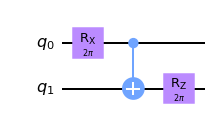

In [63]:
ckt = ansatz(2*np.pi)
ckt.draw(output='mpl')

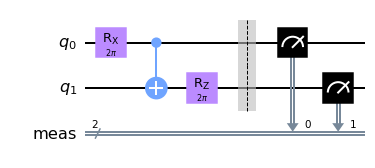

In [64]:
def zz_part(ckt):
    zz_ckt = ckt.copy()
    zz_ckt.measure_all()
    return zz_ckt

zz_ckt = zz_part(ckt)
zz_ckt.draw(output='mpl')

In [65]:
sim = Aer.get_backend("qasm_simulator")

In [66]:
def ZZ(ckt, shots=1000):
    zz_ckt = zz_part(ckt)
    # run the simulation
    res = execute(zz_ckt, backend = sim, shots=shots).result()
    items = res.get_counts(zz_ckt).items()
    
    sm=0
    for key, count in items:
        sm = sm + ((-1)**(int(key[0]) + int(key[1])) * count)
    ans = sm/shots
#     print(ans)
    return ans


In [67]:
def Ham(ckt, shots=1000):
    zz_ans = ZZ(ckt, shots)
    e = 1*zz_ans
    return e

In [68]:
min_energy = 100
for i in range(0, 361):
    ckt = ansatz(i*np.pi/180)
    energy = Ham(ckt, 1000)
#     print(f"current energy for angle theta = {i} is {energy}")
    if(energy < min_energy):
        min_energy = energy

print(f"Minimum energy eigenvalue is: {min_energy}")

Minimum energy eigenvalue is: 1.0


In [69]:
w = np.linalg.eigvals(M)
print(f'Lowest eigenvalue found classicaly is {min(w)}')

Lowest eigenvalue found classicaly is -1.0
